<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/EDA%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 막대 그래프와 히스토그램

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 1. 막대그래프
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

# 도수분포표 작성
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

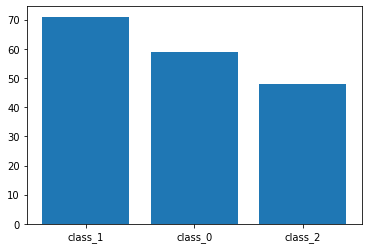

In [ ]:
# 막대그래프 그리기
plt.bar(wine_type.index, wine_type.values, width = 0.8, bottom = None,
        align='center')
plt.show()

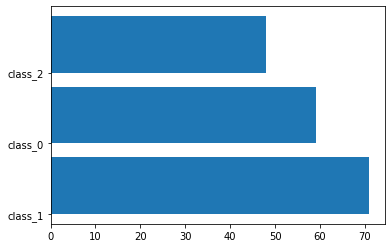

In [ ]:
# 수평 막대그래프 그리기
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, 
         align='edge')
plt.show()

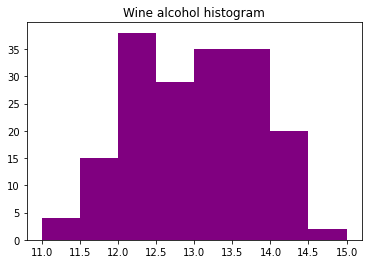

In [ ]:
# 2. 히스토그램
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range = (11,15), color = 'purple', data = wine)
plt.show()

### 상자그림

In [ ]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 상자그림 그리기
plt.boxplot(iris.drop(columns = 'Class'))
plt.show()

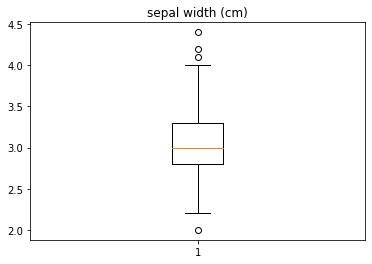

In [ ]:
# 하나의 컬럼만 상자그림으로 표현(sepal width (cm))
plt.boxplot(iris['sepal width (cm)'], whis = 1.5)    # whis : 수염의 길이를 구하기 위해 IQR에 곱할 수 지정
plt.title('sepal width (cm)')
plt.show()

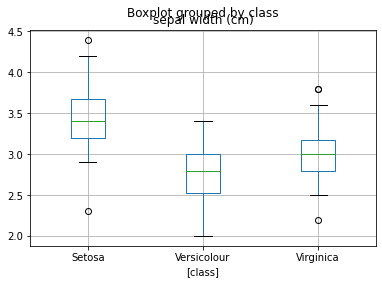

In [ ]:
# 카테고리 변수에 따라 분리하여 상자그림 그리기
iris[['sepal width (cm)', 'class']].boxplot(by = 'class')
plt.show()

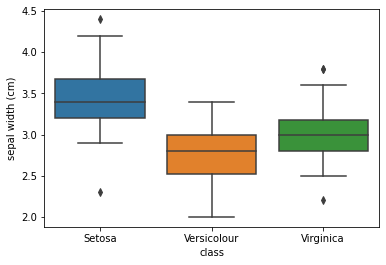

In [ ]:
# 상자그림에 색상 입히기
import seaborn as sns
sns.boxplot(x = 'class', y = 'sepal width (cm)', data = iris)
plt.show()

### 산점도

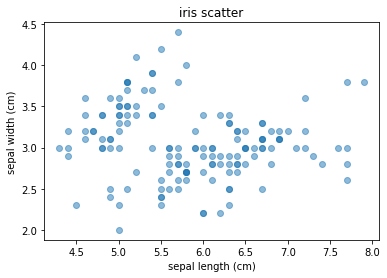

In [ ]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 산점도 그리기
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()

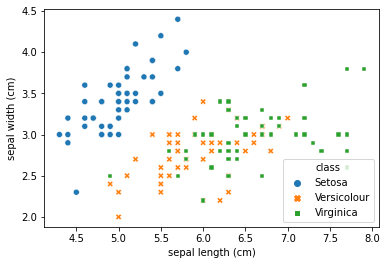

In [ ]:
# 색 분리하여 표시하기
import seaborn as sns
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris, 
                hue = 'class', style = 'class')
plt.show()

### 선 그래프

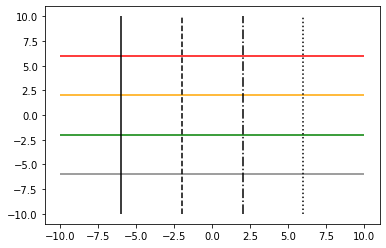

In [ ]:
# 1. 수평선 수직선 그래프
import matplotlib.pyplot as plt

# 수평선
plt.hlines(-6, -10, 10, color = 'gray')
plt.hlines(-2, -10, 10, color = 'green')
plt.hlines(2, -10, 10, color = 'orange')
plt.hlines(6, -10, 10, color = 'red')

# 수직선
plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')

plt.show()

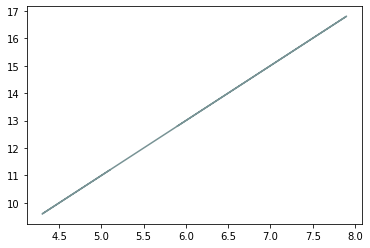

In [ ]:
# 2. 함수식 그래프
# x축 : sepal length (cm)
# y축 : 2x+1

# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 그래프
def linear_func(x) : 
  return 2 * x + 1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='#789395')
plt.show()

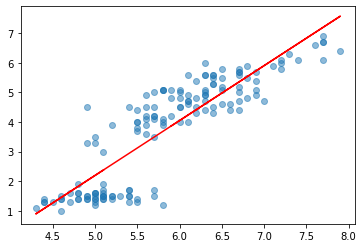

In [ ]:
# 3. 회귀선 그래프 : np.polyfit()
import numpy as np
X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b1*X+b0, color = 'red')
plt.show()

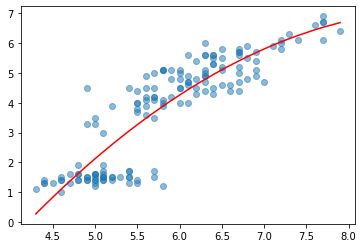

In [ ]:
# 이차식 그래프 그리기 : 데이터를 X값에 대하여 정렬하기
iris2 = iris.sort_values(by = 'sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b0+b1*X+b2*X**2, color = 'red')
plt.show()

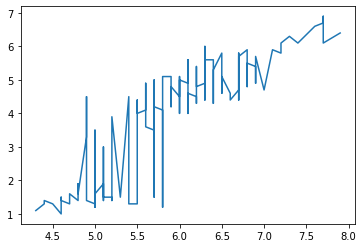

In [ ]:
# 4. 꺾은선 그래프 : X축 값에 대하여 정렬하기
iris2 = iris.sort_values(by = 'sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2)
plt.show()

In [ ]:
iris2['Class'] = load_iris().target
iris2['Class'] = iris2['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
# 카테고리별로 구분된 꺾은선 그래프
plt.plot('sepal length (cm)', 'petal length (cm)', 
         data = iris2.loc[iris2['Class'] == 'Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', 
         data = iris2.loc[iris2['Class'] == 'Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)',
         data = iris2.loc[iris2['Class'] == 'Virginica'])
# 범례 표시
plt.legend(iris2.Class.unique())

plt.show()

### 상관관계 시각화

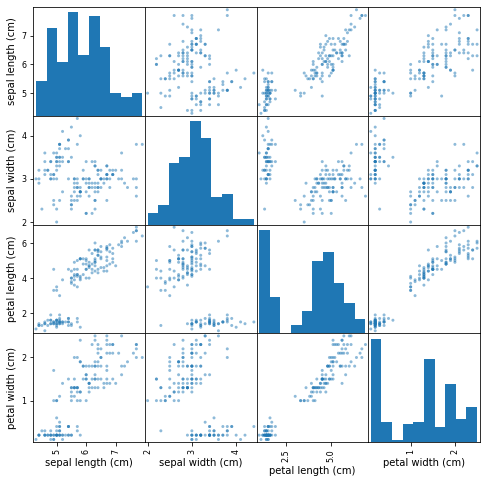

In [1]:
# 1. 산점도 행렬 : scatter_matrix() 함수 사용
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 산점도 행렬
scatter_matrix(iris, alpha = 0.5, figsize = (8,8), diagonal = 'hist')
plt.show()

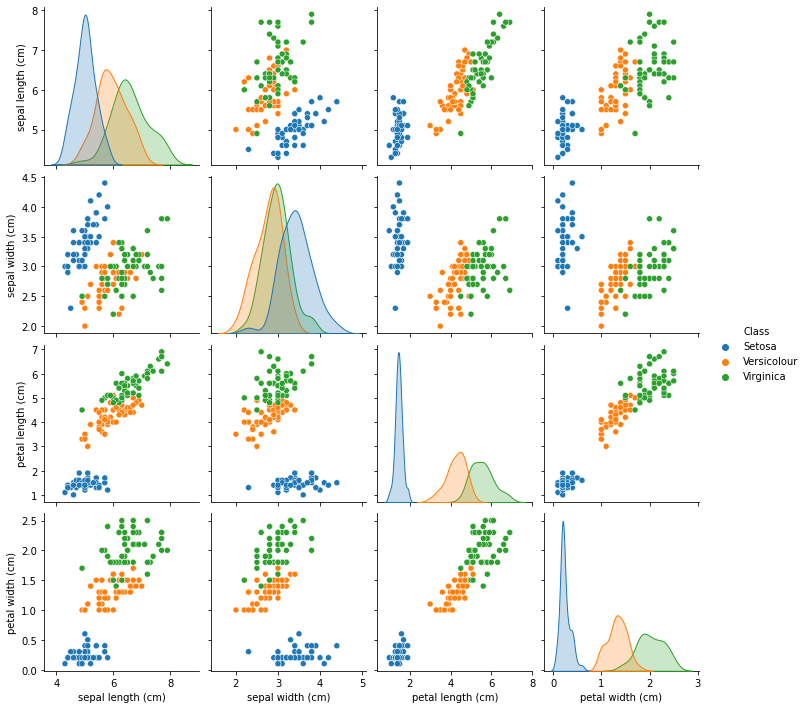

In [2]:
# target범주별 색깔을 다르게 지정하기
import seaborn as sns
sns.pairplot(iris, diag_kind='auto', hue = 'Class')
plt.show()

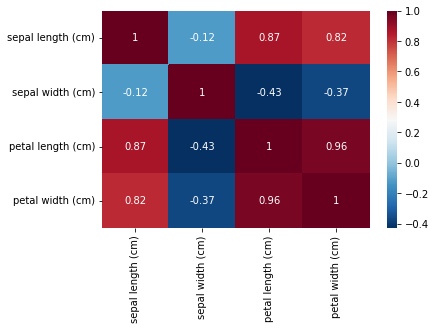

In [5]:
# 상관계수 행렬 그래프 : 히트맵 이용
iris_corr = iris.drop(columns = 'Class').corr(method = 'pearson')

# 히트맵 그리기
sns.heatmap(iris_corr, xticklabels=iris_corr.columns, yticklabels=iris_corr.columns, 
            cmap='RdBu_r', annot = True)
plt.show()

### pandas profiling
 - 데이터프레임에 대한 탐색적 분석을 한 줄의 코드로 수행할 수 있는 라이브러리

In [1]:
# colab환경일 경우 pandas_profiling 재설치
!pip uninstall pandas_profiling
!pip install pandas-profiling[notebook,html]

Found existing installation: pandas-profiling 3.6.0
Uninstalling pandas-profiling-3.6.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.8/dist-packages/pandas_profiling-3.6.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.0-py2.py3-none-any.whl (328 kB)


In [3]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 판다스 프로파일링
ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]